In [80]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [81]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [90]:
class Plotting():
    def scatter(self,
                X_train,
                y_train,
                X_test,
                y_test,
                prediction = None):
        self.fig, self.ax = plt.subplots(figsize=(8,8))

        self.ax.scatter(X_train, y_train, c='blue', label='Training Data')
        self.ax.scatter(X_test, y_test, c='green', label='Testing Data')

        if prediction is not None:
            self.ax.scatter(X_test, prediction, c='yellow', label='Prediction Data')
        self.ax.legend()
        self.fig.tight_layout()

    def plot_loss(self,
                  training_loss,
                  testing_loss,
                  epoch_count):
        self.fig1, self.ax1 = plt.subplots(figsize=(8,7))

        # trainning_loss is in pytorch tensor, and matplotlib works with numpy
        train_loss = np.array(torch.tensor(training_loss).cpu().numpy())
        test_loss = np.array(torch.tensor(testing_loss).cpu().numpy())
        
        self.ax1.plot(epoch_count, train_loss, label='Train Loss')
        self.ax1.plot(epoch_count, test_loss, label='Test Loss')

        self.ax1.set_ylabel('Loss')
        self.ax1.set_xlabel('Epochs')
        self.ax1.legend()
        self.fig1.tight_layout()

X_train: 80, y_train: 80, X_test: 20, y_test: 20


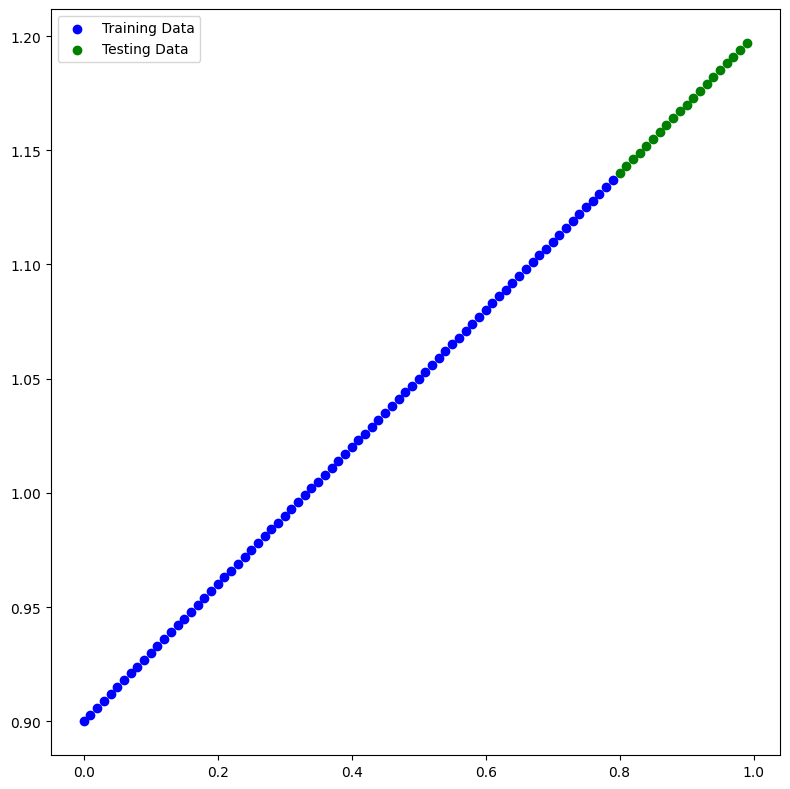

In [91]:
# Create fake data
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01

# data
X = torch.arange(start, end, step, dtype=torch.float)
y = X * weight + bias

# split the data 80% train, 20% test
split = int(0.8*len(X))
X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

X_train = X_train.reshape(-1, 1).float()   # shape: (N, 1)
y_train = y_train.reshape(-1, 1).float()   # shape: (N, 1)
X_test = X_test.reshape(-1, 1).float()
y_test = y_test.reshape(-1, 1).float()

print(f"X_train: {len(X_train)}, y_train: {len(y_train)}, X_test: {len(X_test)}, y_test: {len(y_test)}")
Plotting().scatter(X_train, y_train, X_test, y_test)

In [92]:
X_train.ndim

2

In [93]:
X_train.shape, X_train[:5], y_train[:5]

(torch.Size([80, 1]),
 tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [99]:
# create model
torch.manual_seed(42)
model_1 = LinearRegressionV2()
print(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [100]:
# using MAE loss function: using loss function to calculate loss between predicted y and actual y
loss_fn = nn.L1Loss()

# optimizer: will update weights and biases base on gradient it received
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)


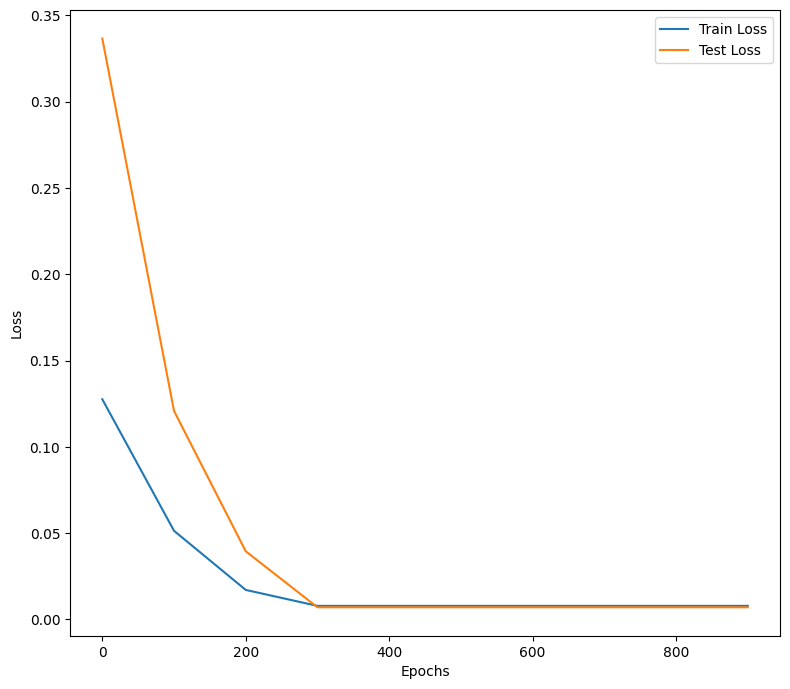

In [101]:
# Training
epochs = 1000
train_losses = []
test_losses= []
epoch_count = []
# loop through data epoch times; one epoch will loop entire data once, so 100, will loop 100 times
for epoch in range(epochs):
    model_1.train() # set model to training mode
    y_preds = model_1(X_train) # do forward pass
    loss = loss_fn(y_preds, y_train) # calculate the loss

    optimizer.zero_grad() # every epoch set optimizer to zero and recalculate
    loss.backward() # backpropagation: do gradient calculation
    optimizer.step() # Gradient Descent: update parameters base on gradient calculation

    # Test
    model_1.eval() # disable trrain mode and enable eval mode for testing
    with torch.inference_mode():
        y_test_pred = model_1(X_test) # testing foward pass
        loss_test = loss_fn(y_test_pred, y_test) # calculate testing losses

        if epoch % 100 == 0:
            train_losses.append(loss)
            test_losses.append(loss_test)
            epoch_count.append(epoch)

Plotting().plot_loss(train_losses, test_losses, epoch_count)
    

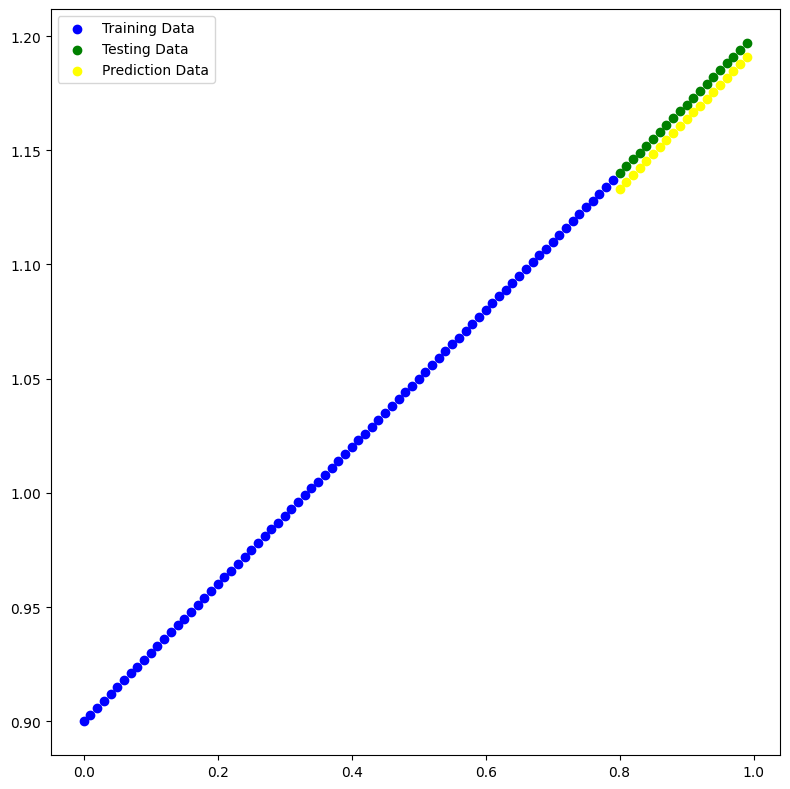

In [104]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
    Plotting().scatter(X_train, y_train, X_test, y_test, y_preds)

In [107]:
# save model dict
torch.save(model_1.state_dict(), "/Users/marcdanielregistre/machine_learning/pytorch/linear_regressionV2/linear_regressionV2.pt")


In [108]:
# load and display the state dic
model_11 = LinearRegressionV2()
model_11.load_state_dict(torch.load("/Users/marcdanielregistre/machine_learning/pytorch/linear_regressionV2/linear_regressionV2.pt"))
model_11.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3028]])),
             ('linear_layer.bias', tensor([0.8910]))])